In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime

In [75]:
df = pd.read_csv("Ops001-1_data.csv",sep=';',parse_dates=["Date"])

In [76]:
df

,Date,Branch Name,# of drop,# of partial,Yesterday paid off #,Today disbursed #,# of irregular borrower,Virtual new borrower,Returning
0,2021-10-25,Jackson Heights,0,50,21,22,121,6,3
1,2021-10-25,Gates Avenue,4,4,24,28,16,3,0
2,2021-10-25,Manhattan,0,4,26,22,30,2,2
3,2021-10-25,Bronx,0,5,20,23,52,2,0
4,2021-10-25,Jamaica-LIC,0,0,32,31,6,5,1
...,...,...,...,...,...,...,...,...,...
205,2021-10-18,Harlem-,6,1,0,0,52,0,0
206,2021-10-18,BAI- Newark,0,0,0,1,1,0,0
207,2021-10-18,Memphis,0,0,0,0,0,0,0
208,2021-10-18,Elevate Area,6,1,0,1,53,0,0


In [77]:
d = datetime.date(2021,10,25)

In [78]:
wd = d.strftime('%A')

In [79]:
wd = 'Sunday'

In [80]:
if wd == 'Saturday' or wd == 'Sunday':
    print('It is Weekend')

It is Weekend


In [81]:
d=str(d)

In [82]:
type(d)

str

In [83]:
d

'2021-10-25'

In [84]:
df = df[df['Date']==d]

In [85]:
df.reset_index(drop=True,inplace=True)

In [86]:
df.head()

,Date,Branch Name,# of drop,# of partial,Yesterday paid off #,Today disbursed #,# of irregular borrower,Virtual new borrower,Returning
0,2021-10-25,Jackson Heights,0,50,21,22,121,6,3
1,2021-10-25,Gates Avenue,4,4,24,28,16,3,0
2,2021-10-25,Manhattan,0,4,26,22,30,2,2
3,2021-10-25,Bronx,0,5,20,23,52,2,0
4,2021-10-25,Jamaica-LIC,0,0,32,31,6,5,1


### Splitting up

In [128]:
# droping 'Grand Total' and Regions
branch = df.drop(labels=[6,13,18,25,27,33,34],axis=0)

In [129]:
# only regions
region = df.iloc[[6,13,18,25,27,33]]

In [130]:
# grand total
total = df.iloc[[34]]

## By Branch graph

In [131]:
branch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     28 non-null     datetime64[ns]
 1   Branch Name              28 non-null     object        
 2   # of drop                28 non-null     object        
 3   # of partial             28 non-null     int64         
 4   Yesterday paid off #     28 non-null     int64         
 5   Today disbursed #        28 non-null     int64         
 6   # of irregular borrower  28 non-null     int64         
 7   Virtual new borrower     28 non-null     int64         
 8   Returning                28 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.2+ KB


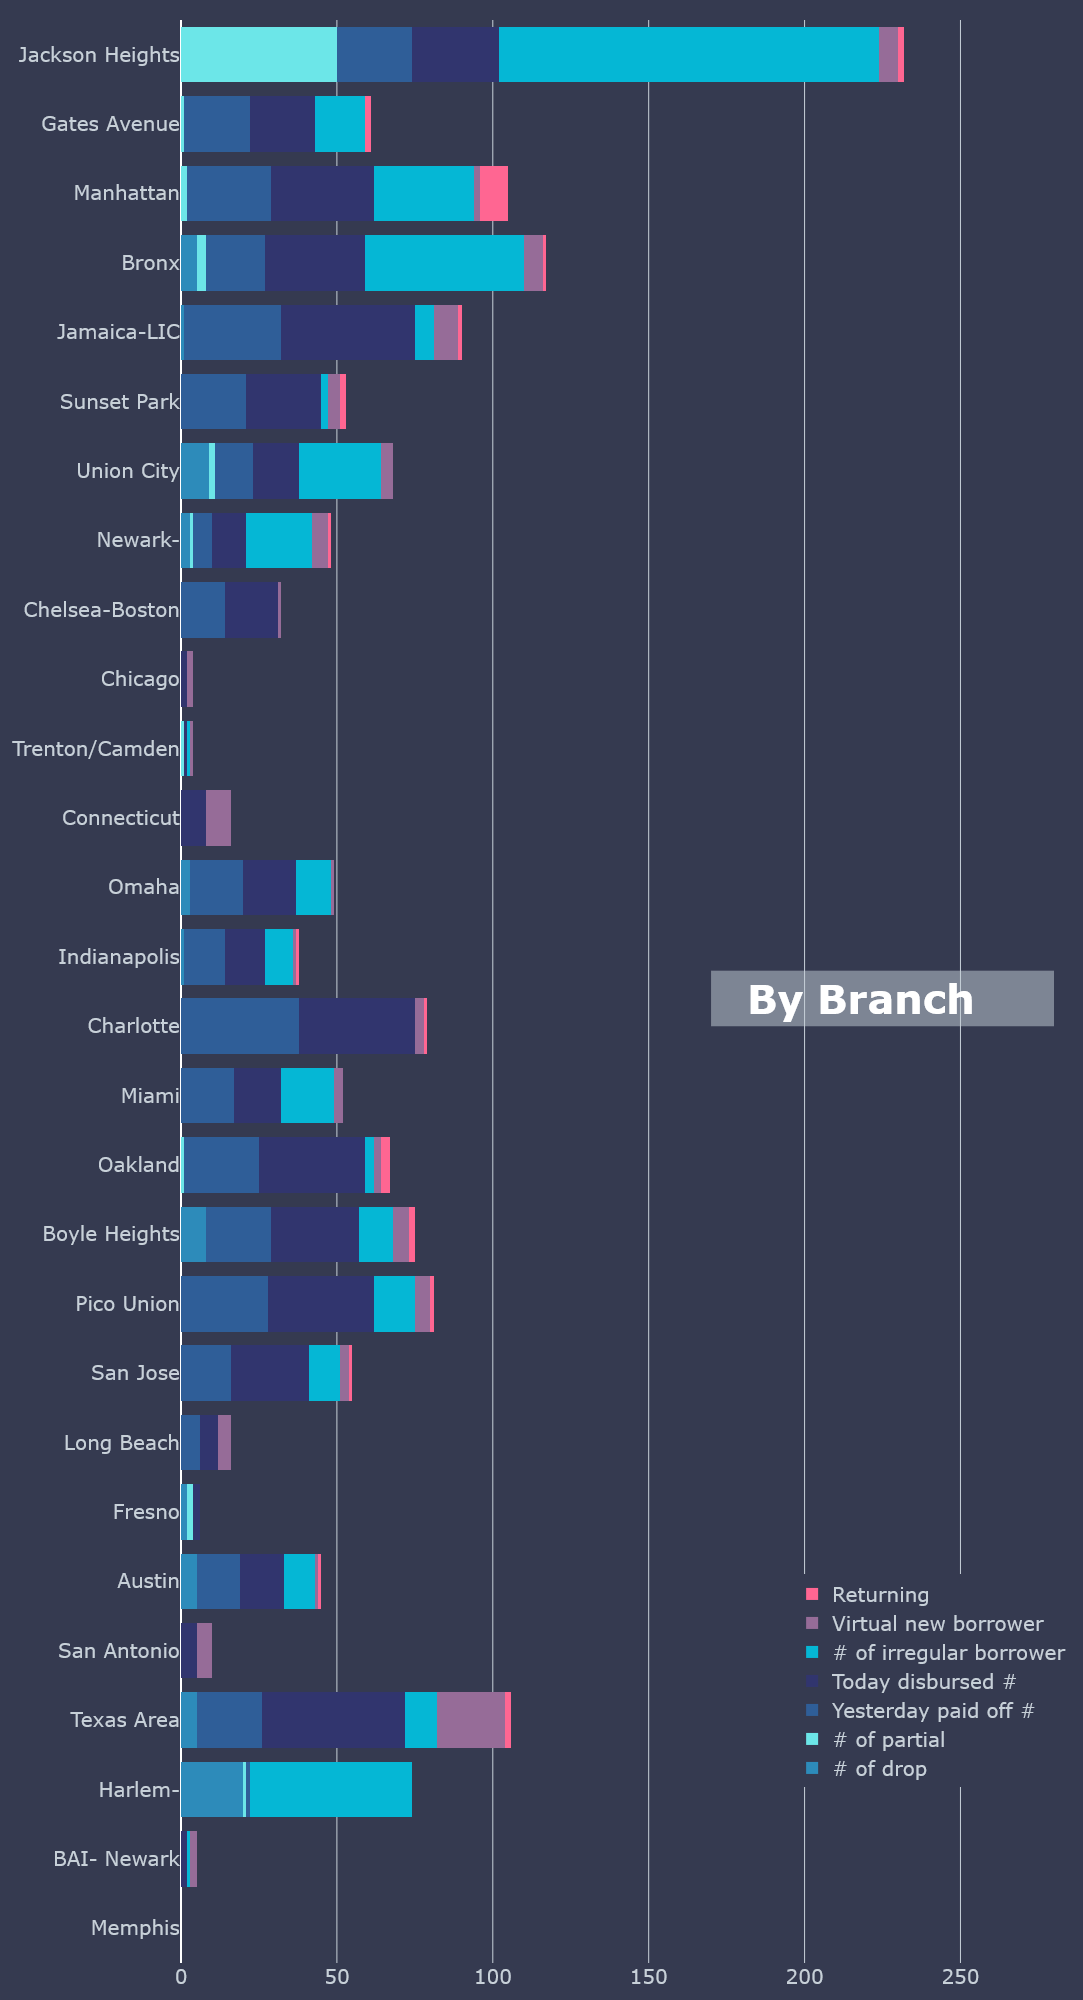

In [133]:
fig = go.Figure(data=[
    go.Bar(name='# of drop', y=branch['Branch Name'], x=branch['# of drop'],
           orientation='h',
           marker_color='rgb(45, 139, 186)'),
    go.Bar(name='# of partial', y=branch['Branch Name'], x=branch['# of partial'],
           orientation='h',
           marker_color='rgb(108, 230, 232)'),
    go.Bar(name='Yesterday paid off #', y=branch['Branch Name'], x=branch['Yesterday paid off #'],
           orientation='h',
           marker_color='rgb(47, 94, 152)'),
    go.Bar(name='Today disbursed #', y=branch['Branch Name'], x=branch['Today disbursed #'],
           orientation='h',
           marker_color='rgb(49, 53, 110)'),
    go.Bar(name='# of irregular borrower', y=branch['Branch Name'], x=branch['# of irregular borrower'],
           orientation='h',
           marker_color='rgb(5, 183, 213)'),
    go.Bar(name='Virtual new borrower', y=branch['Branch Name'], x=branch['Virtual new borrower'],
           orientation='h',
           marker_color='rgb(150, 108, 152)'),
    go.Bar(name='Returning', y=branch['Branch Name'], x=branch['Returning'],orientation='h')
])

# chart layout
fig.update_layout(barmode='stack',height=2000, width=1000,
                  paper_bgcolor='#353a50',
                  plot_bgcolor='#353a50',
                  font_color='rgb(199, 208, 216)',
                  margin=dict(l=20, r=20, t=20, b=20),
                  xaxis = dict(tickfont = dict(size=20)),
                  yaxis = dict(tickfont = dict(size=20)))

fig.update_xaxes(categoryorder='category ascending', gridcolor='#c7d0d8',type='linear')
fig.update_yaxes(autorange="reversed",showline=False)
fig.update_xaxes(range=[0, 280])

# remove line
fig.update_traces(marker_line_width=0)

# legend
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.7,
    font_size=20
))

# Title 
fig.update_layout(
    title=dict(
        text='<b>By Branch</b>',
        x=0.9,
        y=0.5,
        font=dict(
            size=40,
            color='#ffffff'
        )))

# shape behind title
fig.add_shape(type="rect",
    x0=170, y0=14, x1=280, y1=13.2,
    line=dict(color="RoyalBlue",width=0),
    fillcolor="#c7d0d8",
              opacity=0.5
)


fig.show()

__________

## By Region graph

In [12]:
region

,Date,order,Branch Name,# of drop,# of partial,Yesterday paid off #,Today disbursed #,# of irregular borrower,Virtual new borrower,Returning
6,2021-12-25,7,New York Area,4,63,143,145,227,20,6
13,2021-12-25,14,NE Area,6,3,41,46,49,8,1
18,2021-12-25,19,C&SE Area,5,0,66,70,36,15,4
25,2021-12-25,26,CA Area,7,1,88,84,36,11,6
27,2021-12-25,28,Houston,0,0,16,25,0,11,0
33,2021-12-25,34,Elevate Area,7,0,1,1,53,0,0


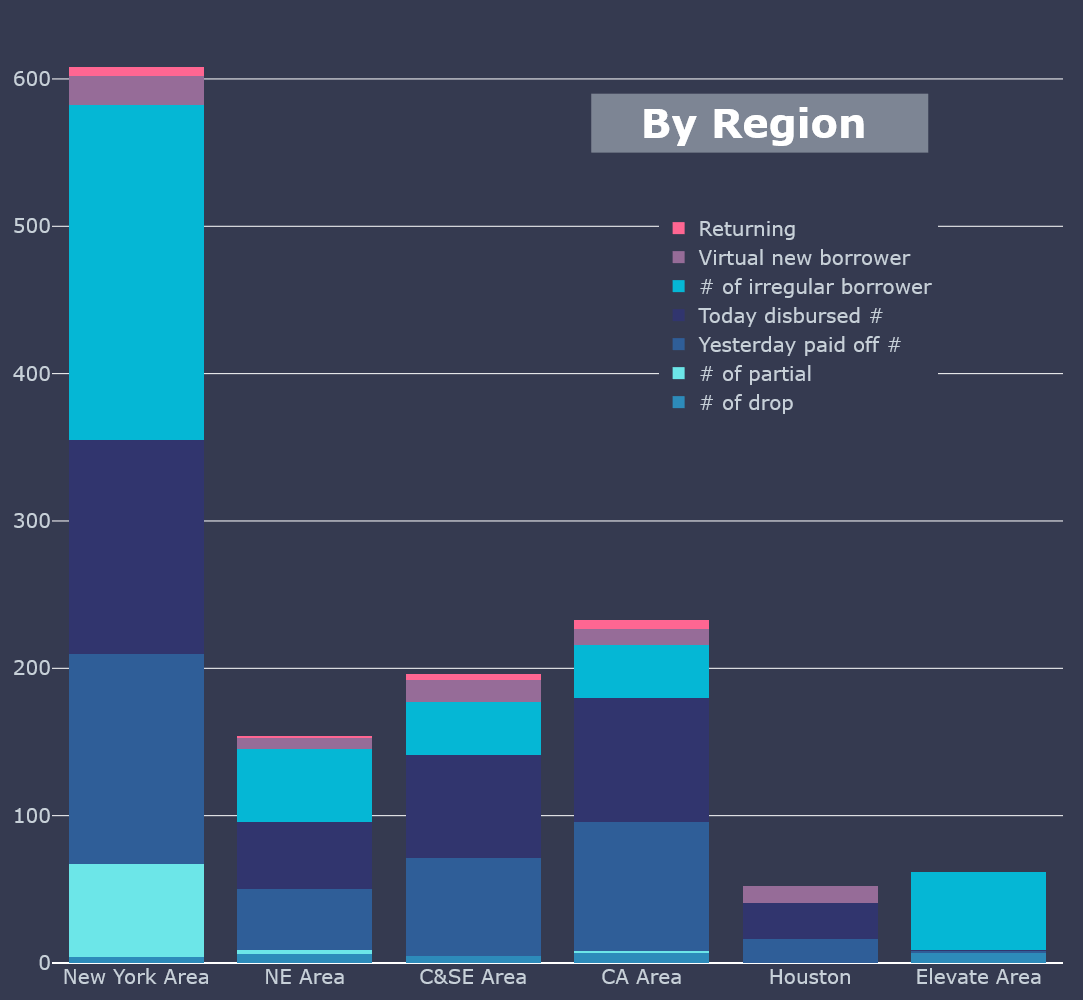

In [13]:
fig = go.Figure(data=[
    go.Bar(name='# of drop', x=region['Branch Name'], y=region['# of drop'],
           marker_color='rgb(45, 139, 186)'),
    go.Bar(name='# of partial', x=region['Branch Name'], y=region['# of partial'],
           marker_color='rgb(108, 230, 232)'),
    go.Bar(name='Yesterday paid off #', x=region['Branch Name'], y=region['Yesterday paid off #'],
           marker_color='rgb(47, 94, 152)'),
    go.Bar(name='Today disbursed #', x=region['Branch Name'], y=region['Today disbursed #'],
           marker_color='rgb(49, 53, 110)'),
    go.Bar(name='# of irregular borrower', x=region['Branch Name'], y=region['# of irregular borrower'],
           marker_color='rgb(5, 183, 213)'),
    go.Bar(name='Virtual new borrower', x=region['Branch Name'], y=region['Virtual new borrower'],
           marker_color='rgb(150, 108, 152)'),
    go.Bar(name='Returning', x=region['Branch Name'], y=region['Returning'])
])

# chart layout
fig.update_layout(barmode='stack',height=1000, width=1000,
                  paper_bgcolor='#353a50',
                  plot_bgcolor='#353a50',
                  font_color='#c7d0d8',
                  margin=dict(l=20, r=20, t=20, b=20),
                  xaxis = dict(tickfont = dict(size=20)),
                  yaxis = dict(tickfont = dict(size=20)))

# legend
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="top",
    y=0.8,
    xanchor="left",
    x=0.6,
    font_size=20
))

# Title 
fig.update_layout(
    title=dict(
        text='<b>By Region</b>',
        x=0.8,
        y=0.89,
        font=dict(
            size=40,
            color='#ffffff'
        )))

# shape behind title
fig.add_shape(type="rect",
    x0=4.7, y0=590, x1=2.7, y1=550,
    line=dict( color="RoyalBlue", width=0),
    fillcolor="#c7d0d8", opacity=0.5)


# remove line
fig.update_traces(marker_line_width=0)

fig.show()

_____

## Grand Total - metrics

In [14]:
total

,Date,order,Branch Name,# of drop,# of partial,Yesterday paid off #,Today disbursed #,# of irregular borrower,Virtual new borrower,Returning
34,2021-12-25,35,Grand Total,29,67,363,382,411,66,17


In [15]:
n_of_drops = total.loc[34,'# of drop']
n_of_partial = total.loc[34,'# of partial']
yesterday_paid = total.loc[34,'Yesterday paid off #']
today_disbursed = total.loc[34,'Today disbursed #']
n_irregulars_borrower = total.loc[34,'# of irregular borrower'] 
virtual_new_borrower = total.loc[34,'Virtual new borrower']
returning = total.loc[34,'Returning']

### # of drop

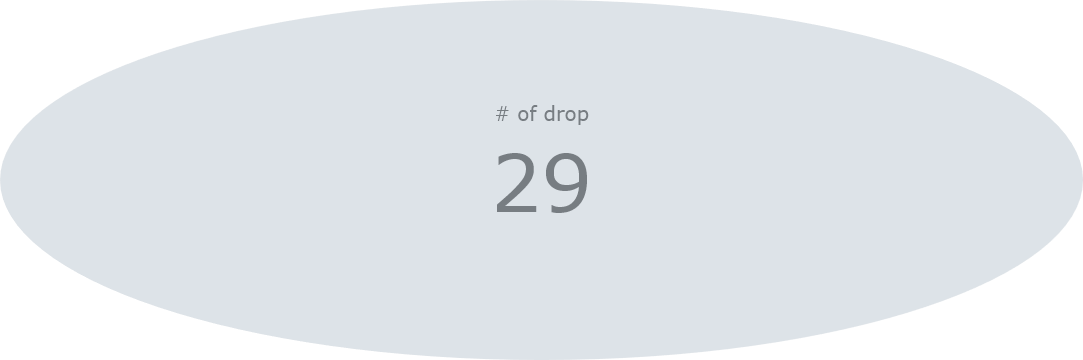

In [16]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = n_of_drops,
    title = {"text": "# of drop"}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

### # of partial

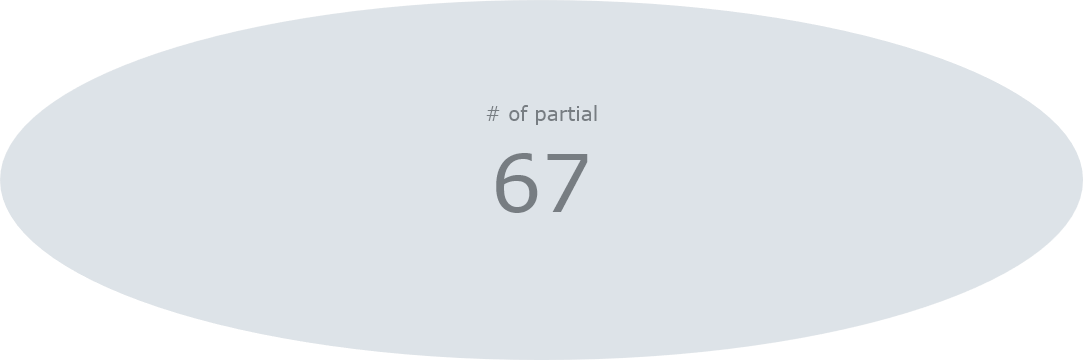

In [335]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = n_of_partial,
    title = {"text": '# of partial'}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

### Yesterday paid off #

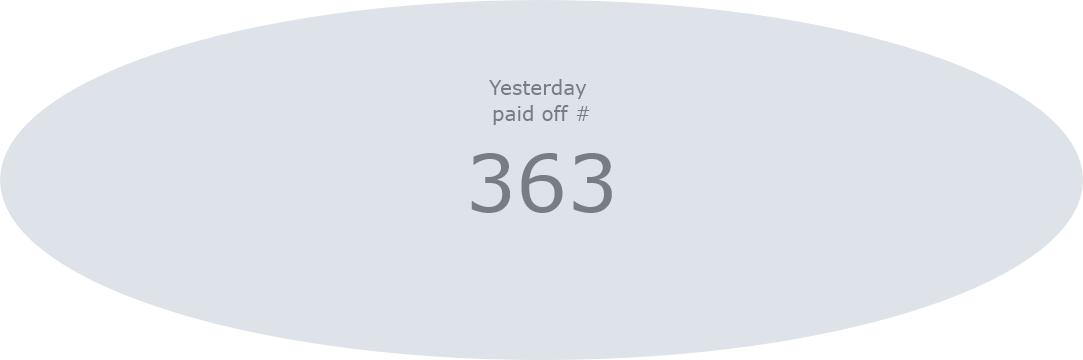

In [360]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = yesterday_paid,
    title = {"text": "Yesterday <br>paid off #"}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

### Today disbursed #

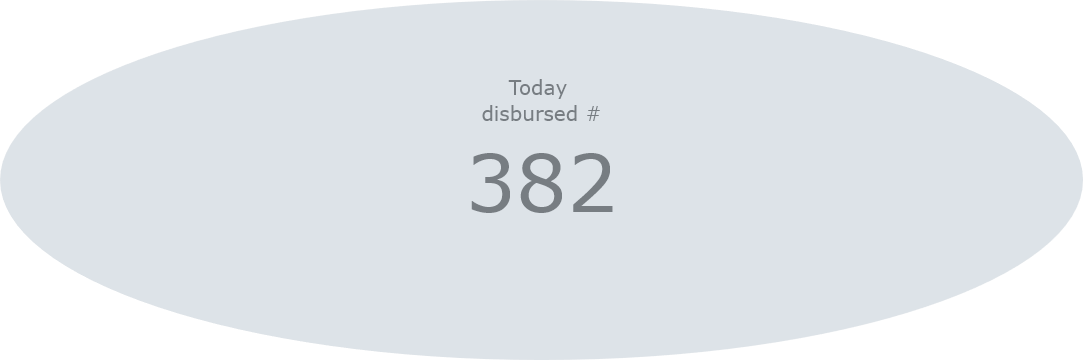

In [378]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = today_disbursed,
    title = {"text": "Today <br>disbursed #"}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

### # of irregulat borrowers

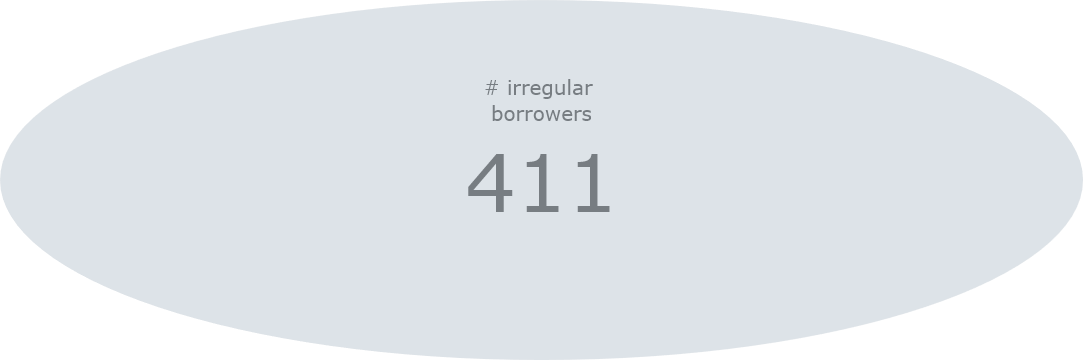

In [379]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = n_irregulars_borrower,
    title = {"text": "# irregular <br>borrowers"}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

### virtual new borrowers

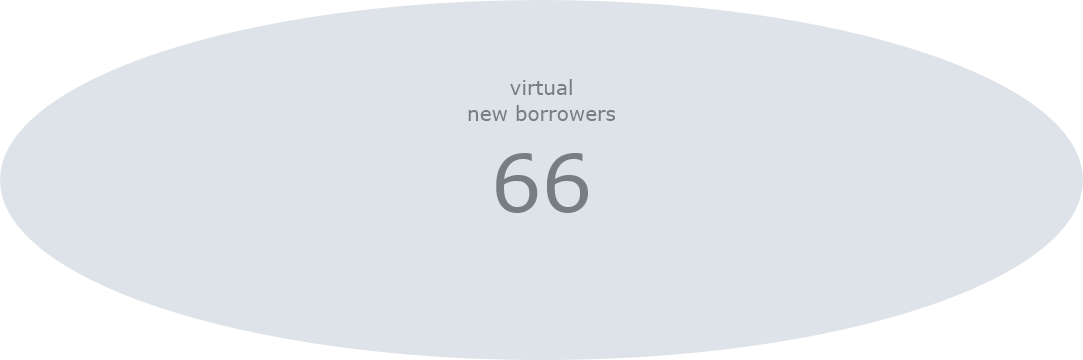

In [380]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = virtual_new_borrower,
    title = {"text": "virtual<br>new borrowers"}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

### Returning

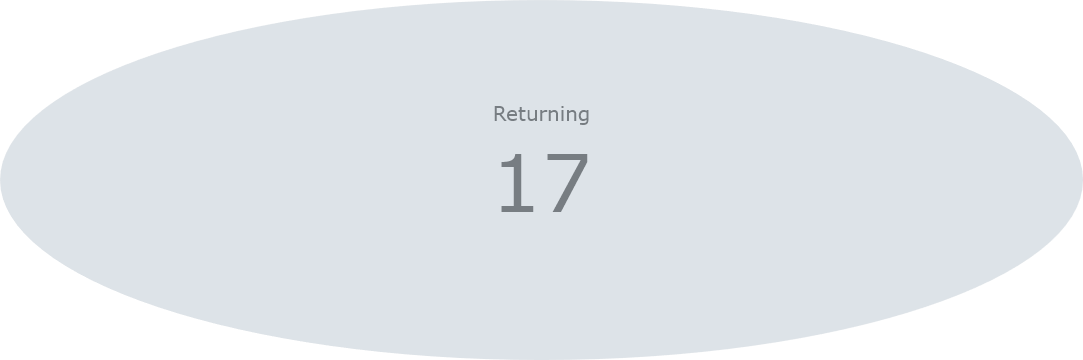

In [381]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = returning,
    title = {"text": "Returning"}))

fig.update_layout(height=250, width=250,
                  paper_bgcolor='#ffffff',
                  plot_bgcolor='#ffffff',
                  font_color='black',
                  margin=dict(l=0, r=0, t=0, b=0))

fig.update_yaxes(showline=False,showgrid=False,showticklabels=False)
fig.update_xaxes(showline=False,showgrid=False,showticklabels=False)

fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#c7d0d8",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="RoyalBlue",width=0),
    opacity=0.6
)

fig.show()

In [87]:
df2 = df.drop('Date',axis=1)

In [88]:
df2.columns

Index(['Branch Name', '# of drop', '# of partial', 'Yesterday paid off #',
       'Today disbursed #', '# of irregular borrower', 'Virtual new borrower',
       'Returning'],
      dtype='object')

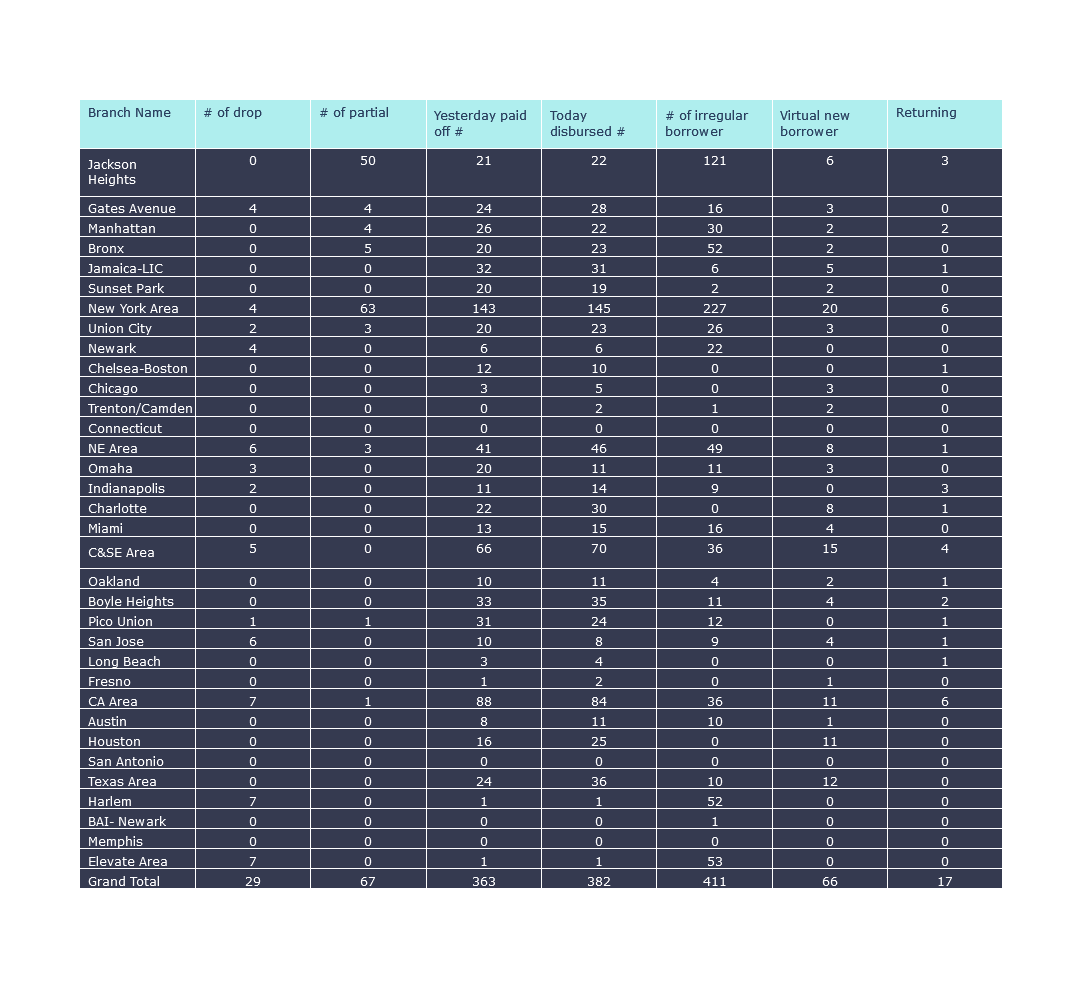

In [98]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df2.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df2['Branch Name'], df2['# of drop'], df2['# of partial'],df2['Yesterday paid off #'],df2['Today disbursed #'],
                       df2['# of irregular borrower'], df2['Virtual new borrower'],df2['Returning']],
               fill_color='#353a50',font = dict(color = 'white'),
               align=['left','center']))
])

fig.update_layout(height=1000, width=1000)

fig.show()